### 1. business understanding 

### 2.Data understanding 

#### 2.1 importer les bibliotheques 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.cluster.hierarchy as shc #?

#### 2.2 - Load Data

In [4]:
filename = r'C:\Users\HOME\vis\student dropout.csv'
data = pd.read_csv(filename)

#### 2.3 - Explore Data

In [5]:
# Get the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (649, 34)


In [6]:
# View the first few rows of the dataset
print(data.head()) 

  School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
0     GP      F   18       U         GT3               A                 4   
1     GP      F   17       U         GT3               T                 1   
2     GP      F   15       U         LE3               T                 1   
3     GP      F   15       U         GT3               T                 4   
4     GP      F   16       U         GT3               T                 3   

   Father_Education Mother_Job Father_Job  ... Free_Time Going_Out  \
0                 4    at_home    teacher  ...         3         4   
1                 1    at_home      other  ...         3         3   
2                 1    at_home      other  ...         3         2   
3                 2     health   services  ...         2         2   
4                 3      other      other  ...         3         2   

   Weekend_Alcohol_Consumption  Weekday_Alcohol_Consumption  Health_Status  \
0                            1  

In [7]:
# Get summary statistics of the dataset
print(data.describe())

              Age  Mother_Education  Father_Education  Travel_Time  \
count  649.000000        649.000000        649.000000   649.000000   
mean    16.744222          2.514638          2.306626     1.568567   
std      1.218138          1.134552          1.099931     0.748660   
min     15.000000          0.000000          0.000000     1.000000   
25%     16.000000          2.000000          1.000000     1.000000   
50%     17.000000          2.000000          2.000000     1.000000   
75%     18.000000          4.000000          3.000000     2.000000   
max     22.000000          4.000000          4.000000     4.000000   

       Study_Time  Number_of_Failures  Family_Relationship   Free_Time  \
count  649.000000          649.000000           649.000000  649.000000   
mean     1.930663            0.221880             3.930663    3.180277   
std      0.829510            0.593235             0.955717    1.051093   
min      1.000000            0.000000             1.000000    1.000000   

In [8]:
# Get information about the dataset, including data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [9]:
print(data['Dropped_Out'].value_counts())

Dropped_Out
False    549
True     100
Name: count, dtype: int64


##### Correlation Matrix

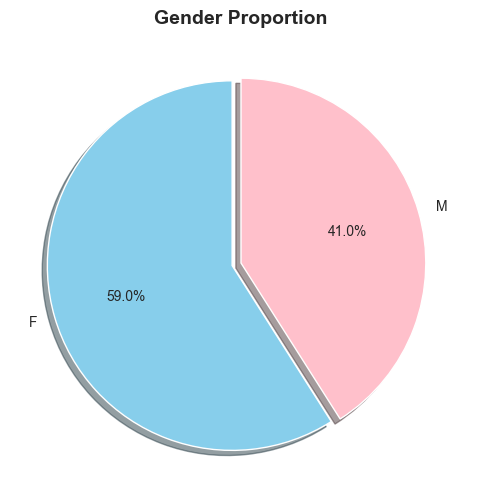

In [12]:
# Gender Proportion
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['skyblue', 'pink'], 
    explode=[0.05, 0],  # Slight separation for effect
    startangle=90,
    shadow=True
)
plt.title('Gender Proportion', fontsize=14, weight='bold')
plt.ylabel('')  # Removes 'y-axis' label
plt.show()

In [16]:
print(data['Dropped_Out'].unique())

# Convert 'Dropped_Out' to numerical values (0 for False, 1 for True)
data['Dropped_Out'] = data['Dropped_Out'].astype(int)

[False  True]


In [17]:
print(data['Dropped_Out'].unique())


[0 1]


In [24]:
# Convert all non-numeric columns to numeric if needed
data_numeric = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for only numeric columns
correlation_matrix = data_numeric.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)



                                  Age  Mother_Education  Father_Education  \
Age                          1.000000         -0.107832         -0.121050   
Mother_Education            -0.107832          1.000000          0.647477   
Father_Education            -0.121050          0.647477          1.000000   
Travel_Time                  0.034490         -0.265079         -0.208288   
Study_Time                  -0.008415          0.097006          0.050400   
Number_of_Failures           0.319968         -0.172210         -0.165915   
Family_Relationship         -0.020559          0.024421          0.020256   
Free_Time                   -0.004910         -0.019686          0.006841   
Going_Out                    0.112805          0.009536          0.027690   
Weekend_Alcohol_Consumption  0.134768         -0.007018          0.000061   
Weekday_Alcohol_Consumption  0.086357         -0.019766          0.038445   
Health_Status               -0.008750          0.004614          0.044910   

In [38]:
# Get the correlation of all features with 'Dropped_Out'
target_correlation = correlation_matrix['Dropped_Out']

# Print the features that are highly correlated with 'Dropped_Out'
# You can adjust the threshold as needed, here I'm using 0.3 as an example
relevant_features = target_correlation[abs(target_correlation) > 0.3].index.tolist()

# Print the relevant features
print("\nRelevant features based on correlation with 'Dropped_Out':\n", relevant_features)



Relevant features based on correlation with 'Dropped_Out':
 ['Number_of_Failures', 'Grade_1', 'Grade_2', 'Final_Grade', 'Dropped_Out']


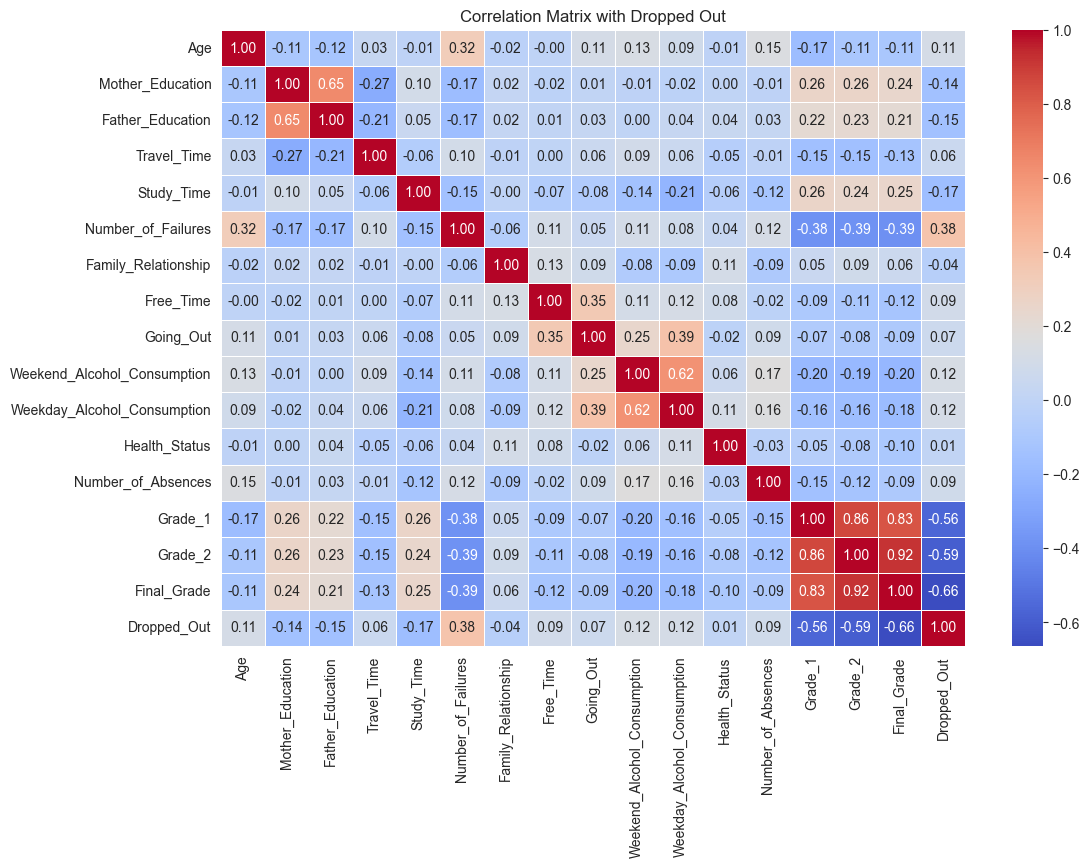

In [35]:
# Plot the correlation map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Dropped Out')
plt.show()


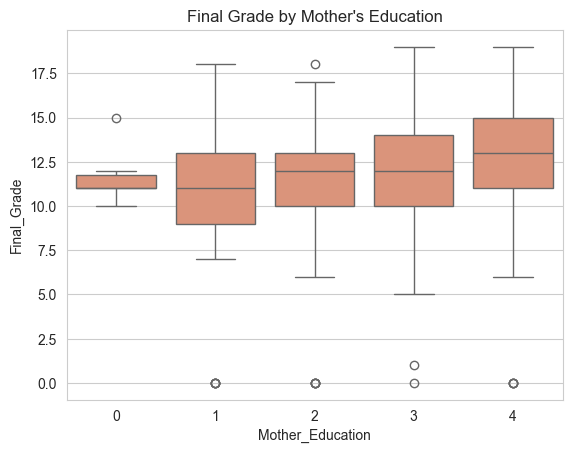

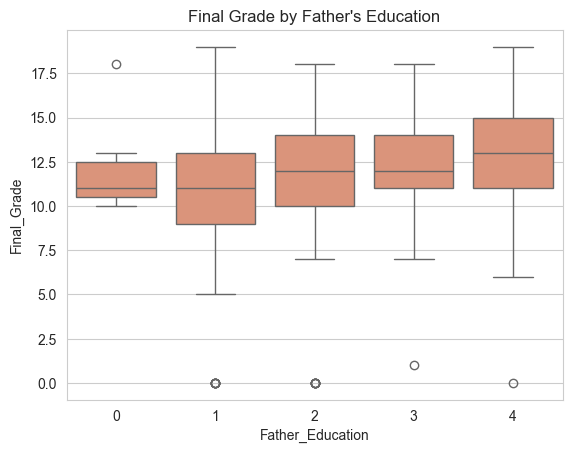

In [19]:
#Analyze how Mother_Education and Father_Education levels affect Final_Grade
sns.boxplot(x='Mother_Education', y='Final_Grade', data=data)
plt.title('Final Grade by Mother\'s Education')
plt.show()

sns.boxplot(x='Father_Education', y='Final_Grade', data=data)
plt.title('Final Grade by Father\'s Education')
plt.show()


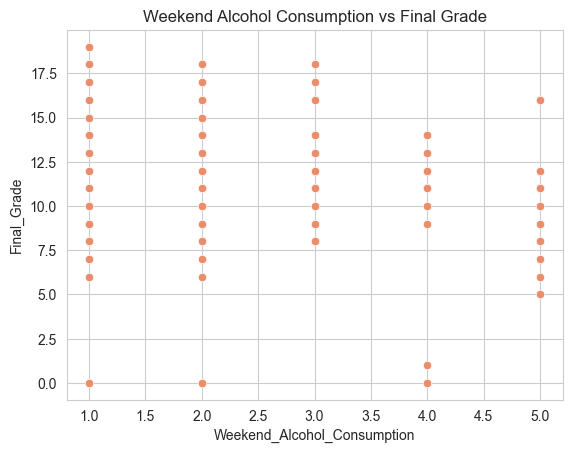

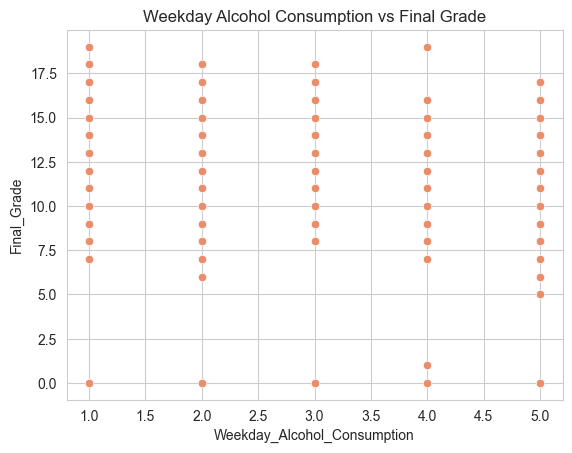

In [20]:
#Compare alcohol consumption (Weekend_Alcohol_Consumption vs. Weekday_Alcohol_Consumption) and its impact on grades 
sns.scatterplot(x='Weekend_Alcohol_Consumption', y='Final_Grade', data=data)
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.show()

sns.scatterplot(x='Weekday_Alcohol_Consumption', y='Final_Grade', data=data)
plt.title('Weekday Alcohol Consumption vs Final Grade')
plt.show()


In OUR matrix, the following columns have very low correlations (near 0) with "Dropped_Out":

Age (0.11)
Mother_Education (0.13)
Father_Education (0.09)
Travel_Time (0.12)
Study_Time (0.13)
Free_Time (-0.12)
Health_Status (0.09)
Grade_1 (-0.17)
Grade_2 (-0.18)

In [21]:
# List of columns to drop based on low correlation with "Dropped_Out"
columns_to_drop = [
    'Age', 'Mother_Education', 'Father_Education', 'Travel_Time', 
    'Study_Time', 'Free_Time', 'Health_Status', 'Grade_1', 'Grade_2','School'
]

# Drop the specified columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)



In [22]:
data_cleaned.head()

,Gender,Address,Family_Size,Parental_Status,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Number_of_Failures,School_Support,...,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Final_Grade,Dropped_Out
0,F,U,GT3,A,at_home,teacher,course,mother,0,yes,...,yes,no,no,4,4,1,1,4,11,0
1,F,U,GT3,T,at_home,other,course,father,0,no,...,yes,yes,no,5,3,1,1,2,11,0
2,F,U,LE3,T,at_home,other,other,mother,0,yes,...,yes,yes,no,4,2,2,3,6,12,0
3,F,U,GT3,T,health,services,home,mother,0,no,...,yes,yes,yes,3,2,1,1,0,14,0
4,F,U,GT3,T,other,other,home,father,0,no,...,yes,no,no,4,2,1,2,0,13,0


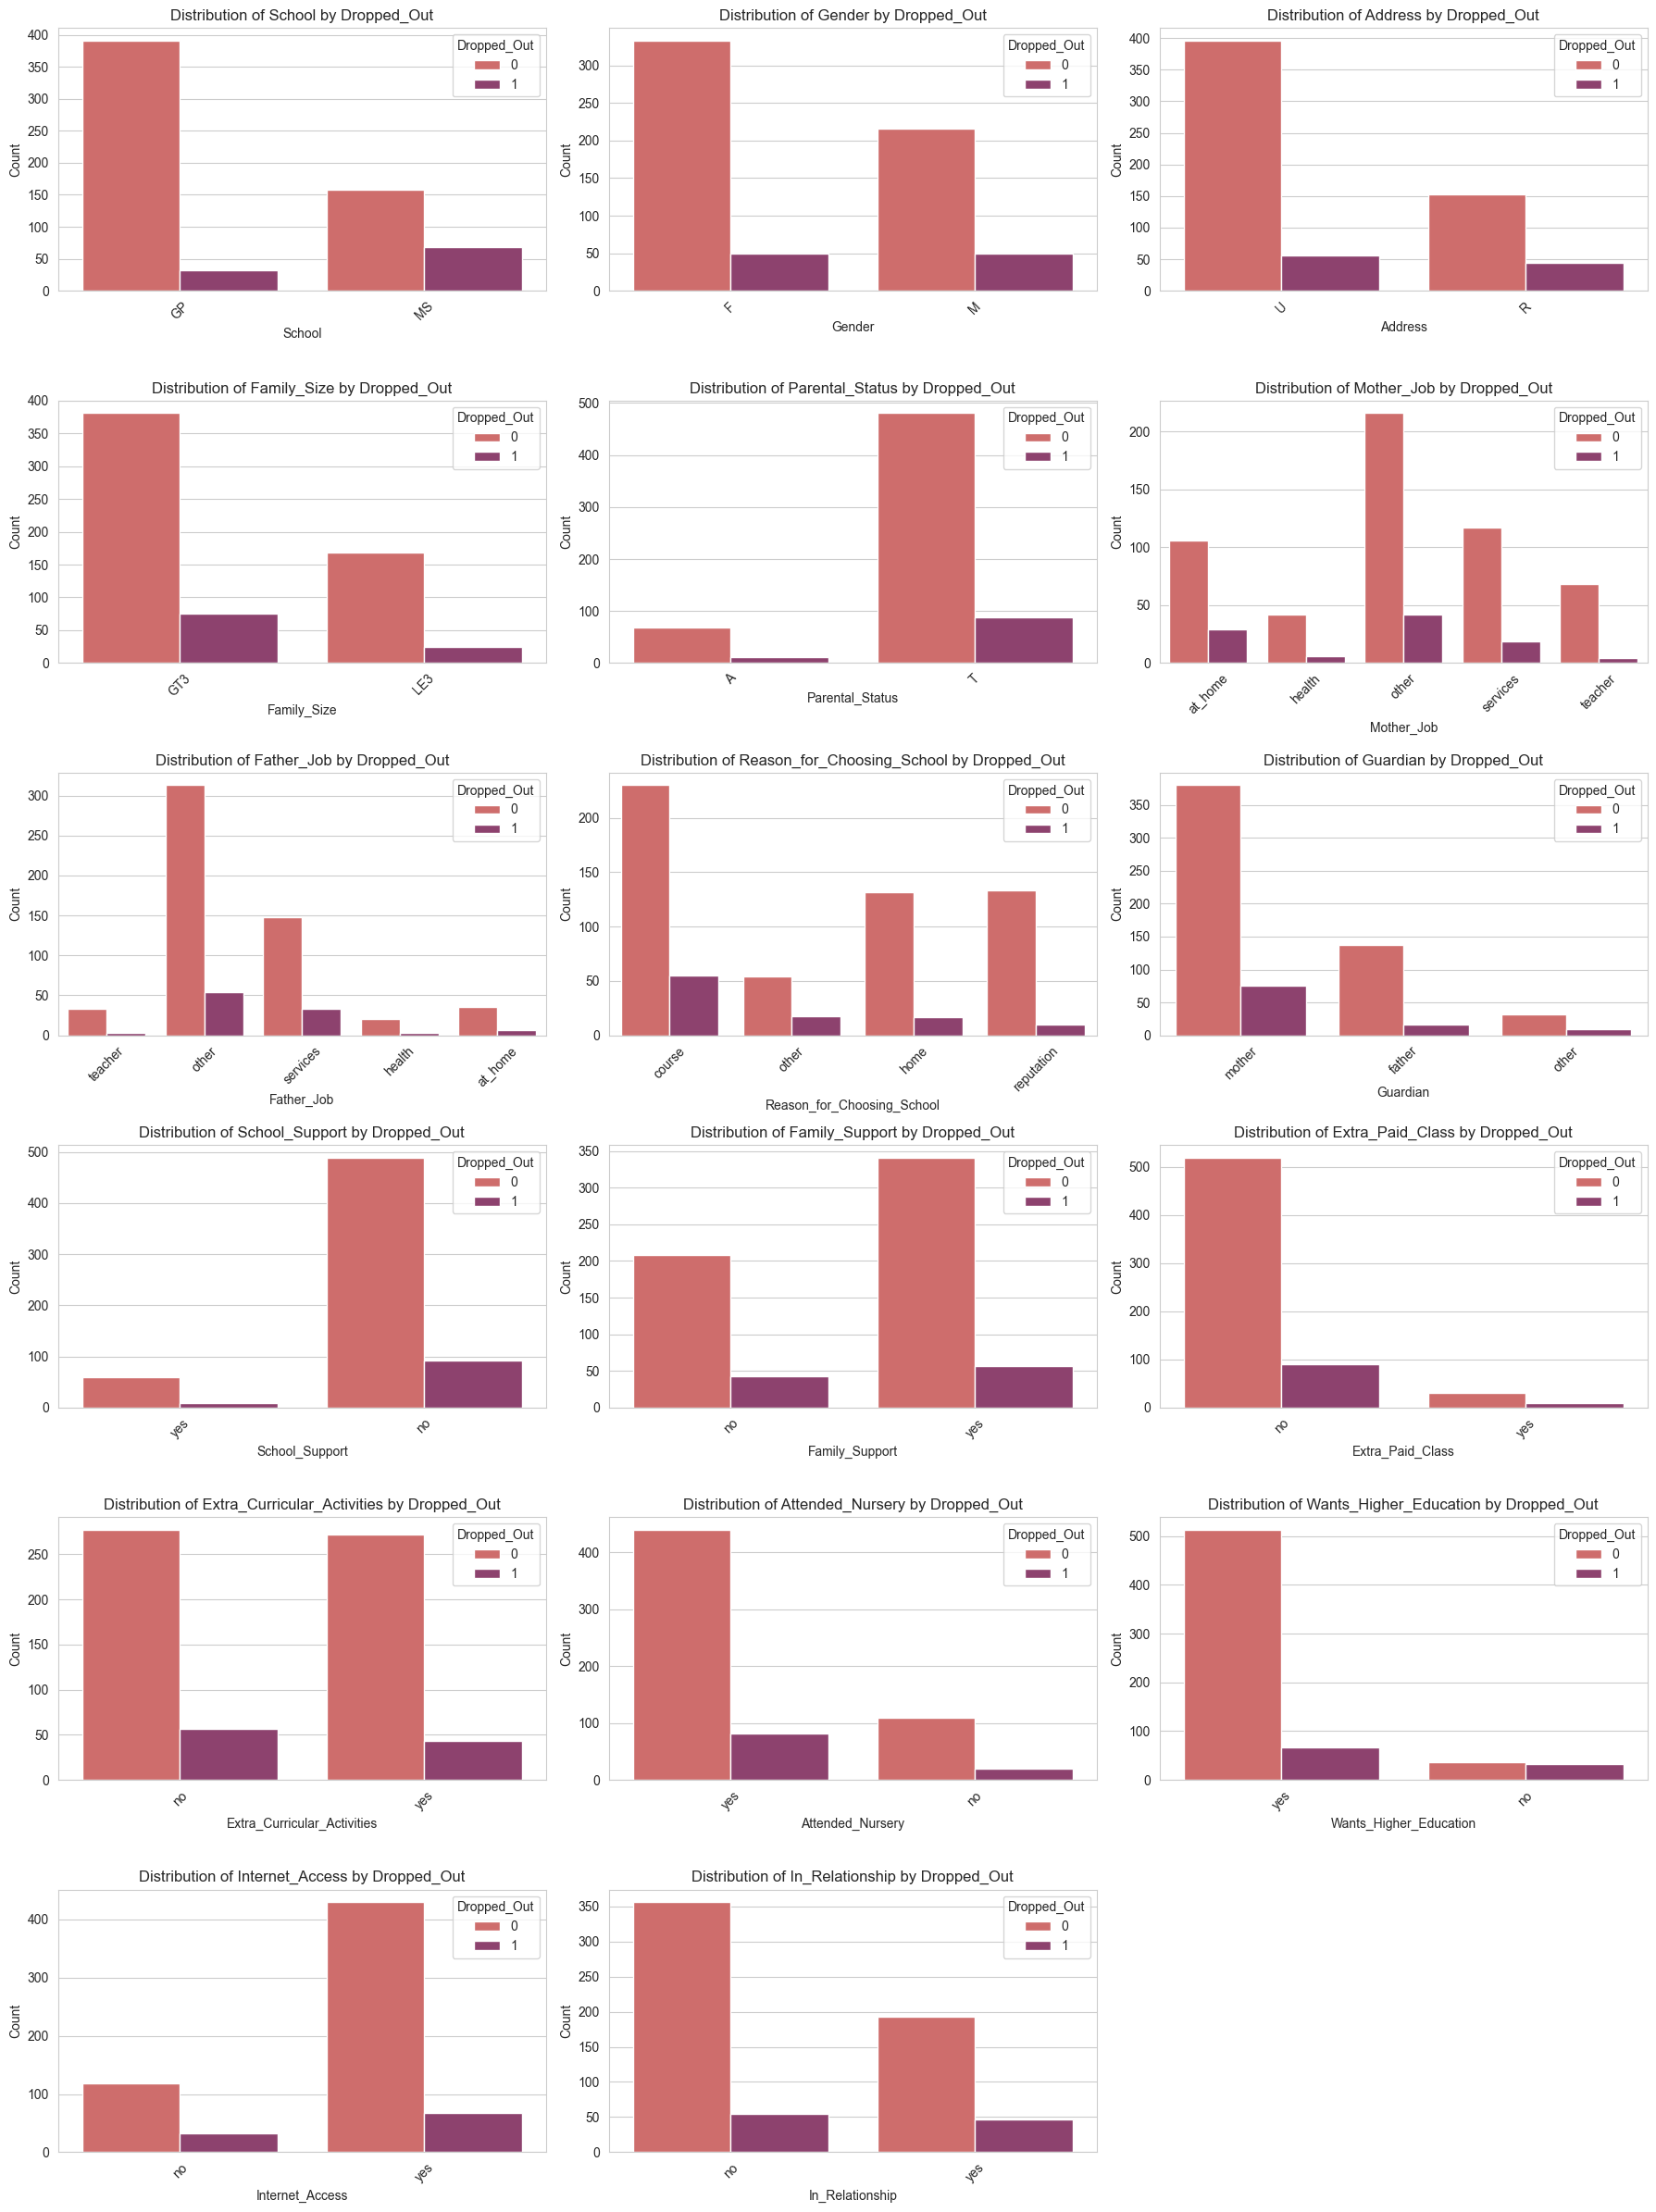

In [26]:
# Filter categorical (object) and boolean columns
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Define the number of subplots
num_cols = len(categorical_columns)
nrows = (num_cols + 2) // 3  # Create rows of 3 plots each

# Set the color palette (hot colors)
sns.set_palette("flare")

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(18, 4 * nrows))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(
        data=data,
        x=col,
        hue="Dropped_Out",
        ax=ax,
        palette="flare"
    )
    ax.set_title(f"Distribution of {col} by Dropped_Out")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Dropped_Out")
    ax.tick_params(axis="x", rotation=45)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import chi2_contingency

# Function to compute Chi-Square test for each categorical column
def chi_square_test(data, target, categorical_columns):
    significant_features = []
    for col in categorical_columns:
        contingency_table = pd.crosstab(data[col], data[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Feature: {col}")
        print(f"Chi-Square Statistic: {chi2:.4f}, P-value: {p:.4f}\n")
        
        if p < 0.05:
            significant_features.append(col)
    
    return significant_features

# Perform the Chi-Square test
significant_features = chi_square_test(data, "Dropped_Out", categorical_columns)

#Features with p < 0.05 are considered significant and relevant to the target.
print("Significant Features Associated with Dropped_Out:")
print(significant_features)


Feature: School
Chi-Square Statistic: 55.6164, P-value: 0.0000

Feature: Gender
Chi-Square Statistic: 3.5427, P-value: 0.0598

Feature: Address
Chi-Square Statistic: 9.6631, P-value: 0.0019

Feature: Family_Size
Chi-Square Statistic: 1.4667, P-value: 0.2259

Feature: Parental_Status
Chi-Square Statistic: 0.0000, P-value: 1.0000

Feature: Mother_Job
Chi-Square Statistic: 9.8599, P-value: 0.0429

Feature: Father_Job
Chi-Square Statistic: 2.7752, P-value: 0.5961

Feature: Reason_for_Choosing_School
Chi-Square Statistic: 17.9882, P-value: 0.0004

Feature: Guardian
Chi-Square Statistic: 4.6273, P-value: 0.0989

Feature: School_Support
Chi-Square Statistic: 0.4929, P-value: 0.4826

Feature: Family_Support
Chi-Square Statistic: 0.7293, P-value: 0.3931

Feature: Extra_Paid_Class
Chi-Square Statistic: 1.2985, P-value: 0.2545

Feature: Extra_Curricular_Activities
Chi-Square Statistic: 1.2004, P-value: 0.2732

Feature: Attended_Nursery
Chi-Square Statistic: 0.0037, P-value: 0.9515

Feature: Wants

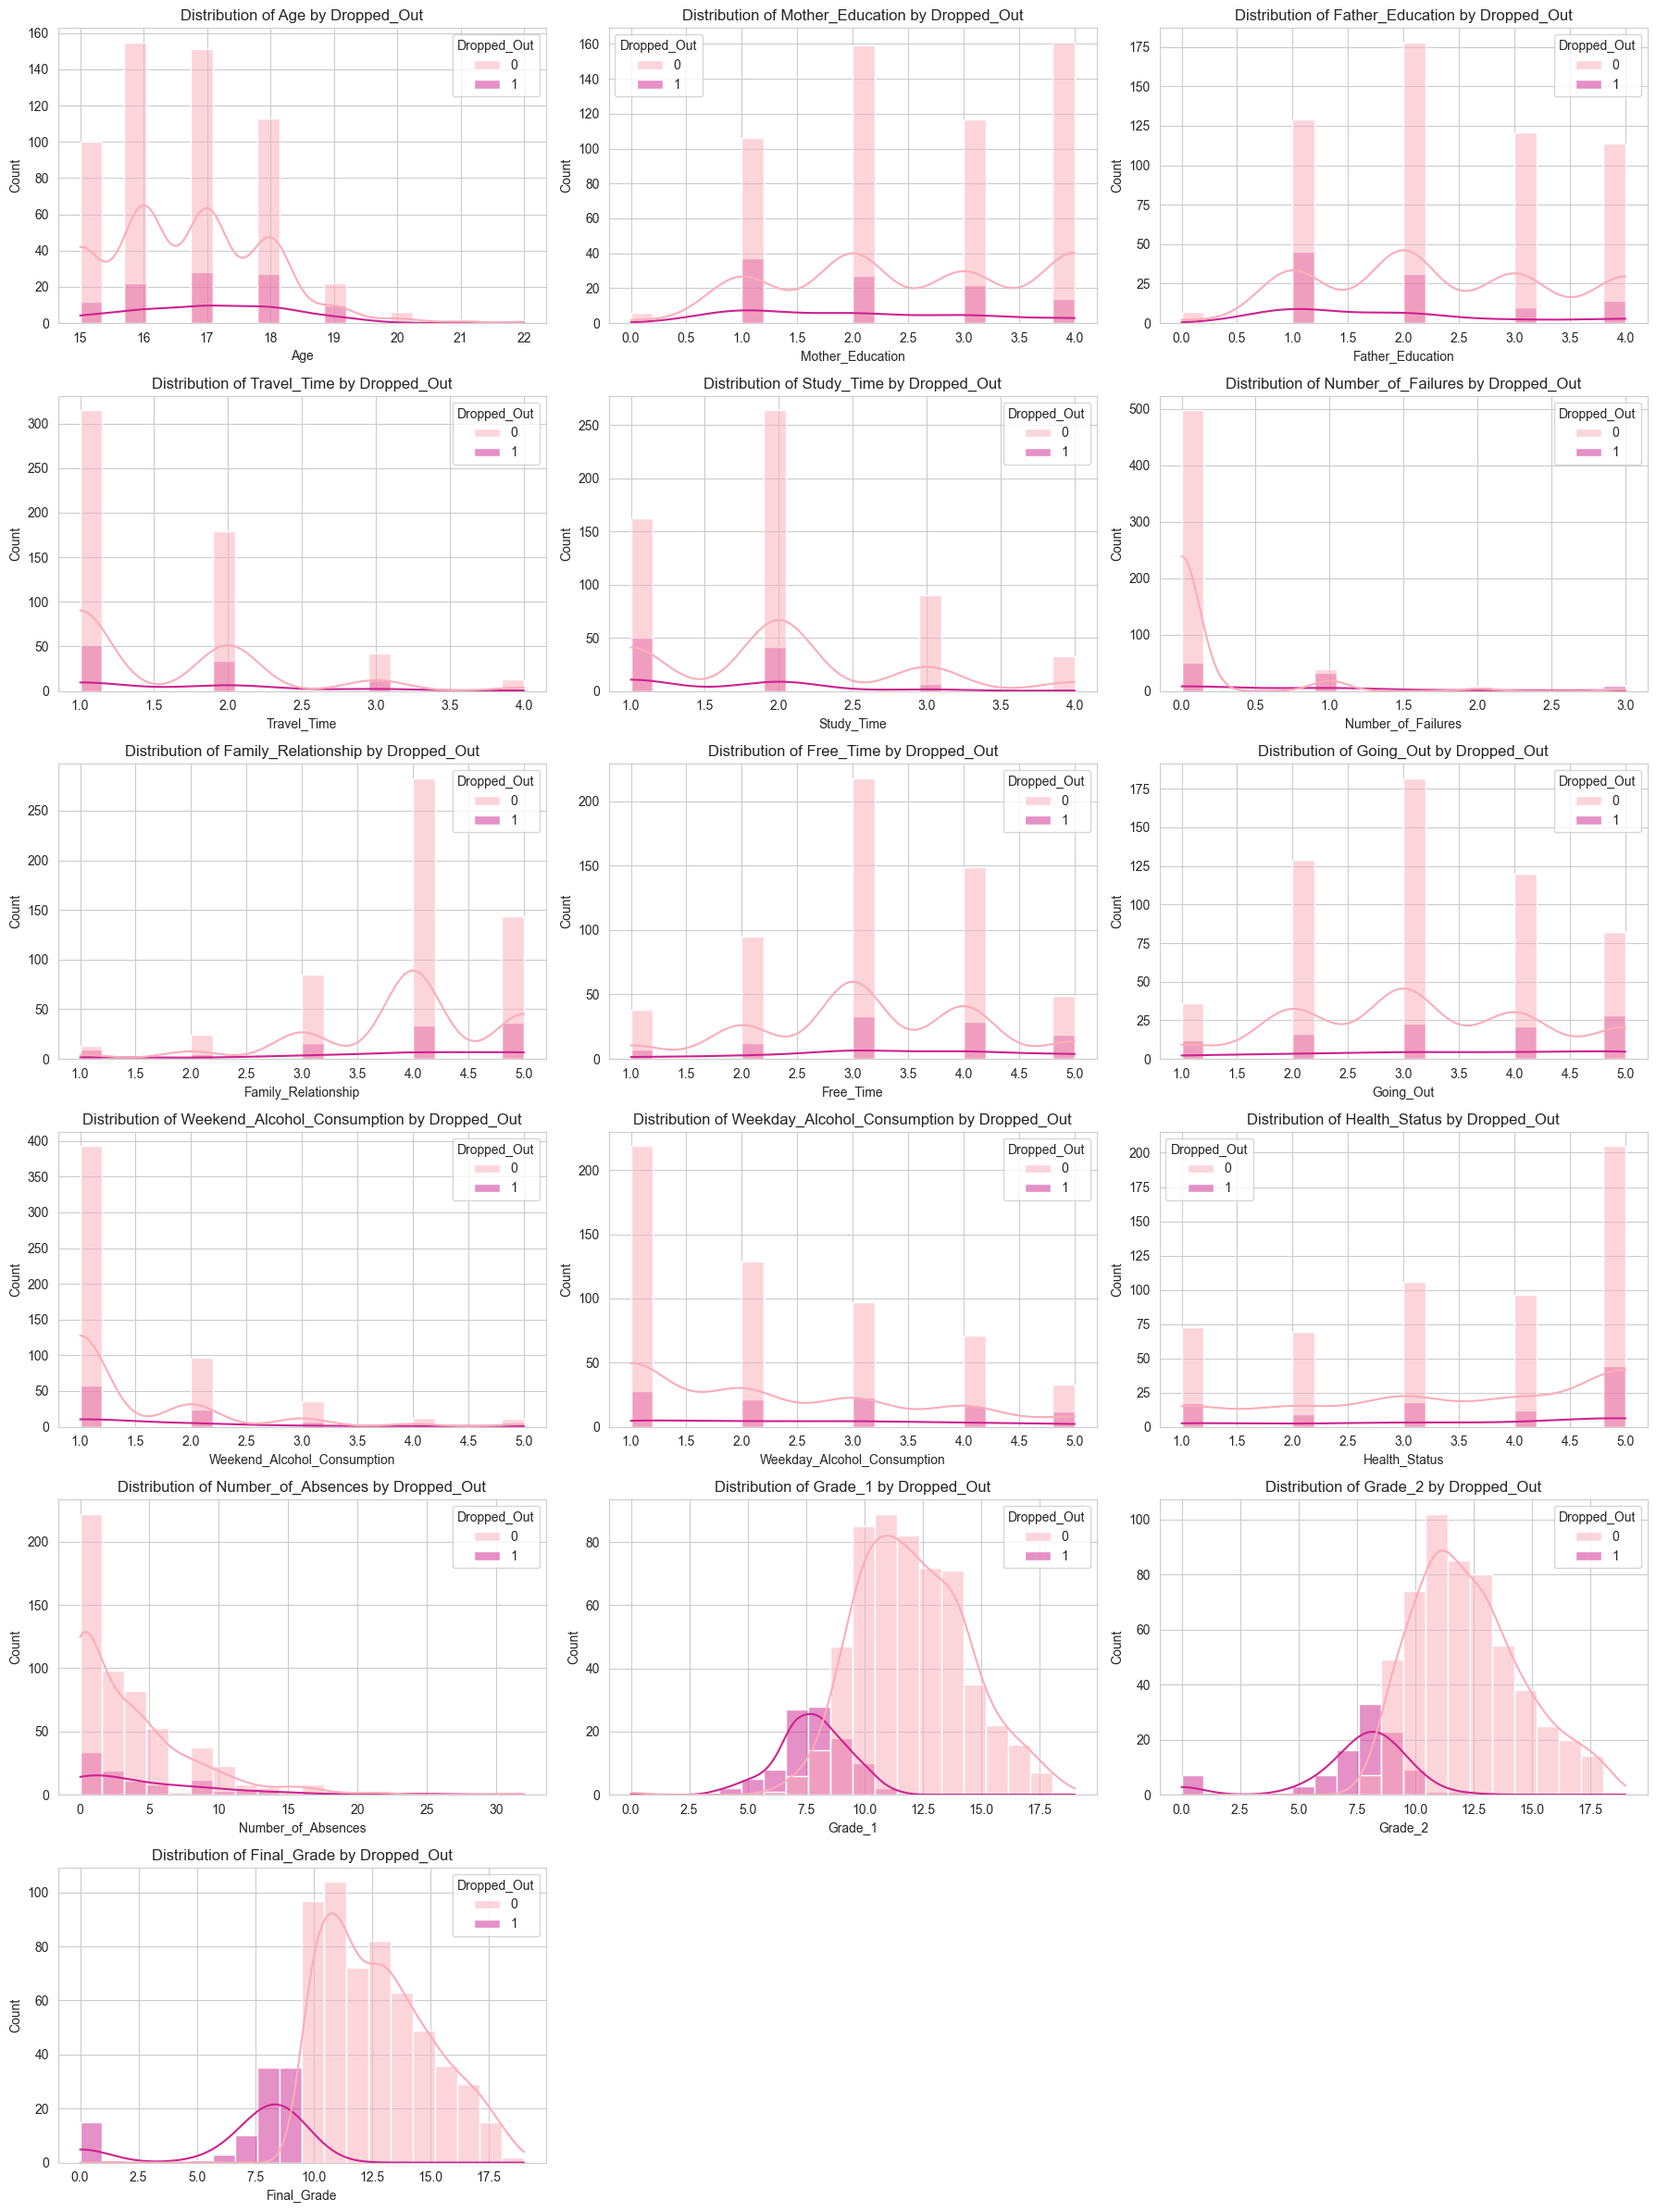

In [30]:

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Dropped_Out']

# Create subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3 + (num_cols % 3 > 0)), ncols=3, figsize=(18, 4 * (num_cols // 3 + 1)))
axes = axes.flatten()

# Loop through numerical columns and plot their distributions
for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, hue="Dropped_Out", kde=True, palette="RdPu", ax=axes[i], bins=20)
    axes[i].set_title(f"Distribution of {col} by Dropped_Out")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [33]:
from scipy.stats import f_oneway

# Function for ANOVA test
def anova_test(data, feature, target):
    groups = [data[data[target] == val][feature].values for val in data[target].unique()]
    f_stat, p_value = f_oneway(*groups)
    return p_value

# Test ANOVA for each numerical feature against the target
anova_p_values = {}
for col in numerical_columns:
    p_value = anova_test(data, col, 'Dropped_Out')
    anova_p_values[col] = p_value

anova_p_values = {k: v for k, v in sorted(anova_p_values.items(), key=lambda item: item[1])}
print(anova_p_values)

# Filter features with p-value < 0.05 (significant)
relevant_features = [col for col, p in anova_p_values.items() if p < 0.05]




{'Final_Grade': np.float64(1.8561798981604877e-83), 'Grade_2': np.float64(1.0848520931684683e-62), 'Grade_1': np.float64(1.478079774183599e-55), 'Number_of_Failures': np.float64(9.383797729341315e-24), 'Study_Time': np.float64(2.3660185264706287e-05), 'Father_Education': np.float64(0.00018497231006598202), 'Mother_Education': np.float64(0.00021447334647767843), 'Weekend_Alcohol_Consumption': np.float64(0.0016021830460606213), 'Weekday_Alcohol_Consumption': np.float64(0.0030185823705456555), 'Age': np.float64(0.004743603435770186), 'Free_Time': np.float64(0.01737229193923214), 'Number_of_Absences': np.float64(0.02583758471318448), 'Going_Out': np.float64(0.08696426205183291), 'Travel_Time': np.float64(0.14085267730864637), 'Family_Relationship': np.float64(0.2524427121803341), 'Health_Status': np.float64(0.7996951987534167)}


In [34]:
# Display relevant feature column names
print("Relevant features based on ANOVA p-values (p < 0.05):")
print(relevant_features)

Relevant features based on ANOVA p-values (p < 0.05):
['Final_Grade', 'Grade_2', 'Grade_1', 'Number_of_Failures', 'Study_Time', 'Father_Education', 'Mother_Education', 'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption', 'Age', 'Free_Time', 'Number_of_Absences']


In [45]:
# List of relevant columns to keep
relevant_columns = [
    "Dropped_Out",
    "Age",
    "Number_of_Failures",
    "Weekend_Alcohol_Consumption",
    "Weekday_Alcohol_Consumption",
    "Number_of_Absences",
    "Study_Time",
    "Mother_Education",
    "Father_Education",
    "School",
    'Address', 
    'Mother_Job', 
    'Father_Job',
    'Reason_for_Choosing_School', 
    'Wants_Higher_Education', 
    'Internet_Access',
    'Final_Grade'
]

# Drop all other columns
df = data[relevant_columns]


In [46]:
df.dtypes

Dropped_Out                     int64
Age                             int64
Number_of_Failures              int64
Weekend_Alcohol_Consumption     int64
Weekday_Alcohol_Consumption     int64
Number_of_Absences              int64
Study_Time                      int64
Mother_Education                int64
Father_Education                int64
School                         object
Address                        object
Mother_Job                     object
Father_Job                     object
Reason_for_Choosing_School     object
Wants_Higher_Education         object
Internet_Access                object
Final_Grade                     int64
dtype: object

In [47]:
df.isna().sum()

Dropped_Out                    0
Age                            0
Number_of_Failures             0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Number_of_Absences             0
Study_Time                     0
Mother_Education               0
Father_Education               0
School                         0
Address                        0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Wants_Higher_Education         0
Internet_Access                0
Final_Grade                    0
dtype: int64

In [51]:
    # List of categorical columns to check
    categorical_columns = ['School', 'Address', 'Mother_Job','Father_Job', 'Reason_for_Choosing_School', 'Wants_Higher_Education', 'Internet_Access']
    
    # Loop through each column and display the unique values
    for col in categorical_columns:
        print(f"Unique values in '{col}':")
        print(data[col].unique())
        print("\n")


Unique values in 'School':
['GP' 'MS']


Unique values in 'Address':
['U' 'R']


Unique values in 'Mother_Job':
['at_home' 'health' 'other' 'services' 'teacher']


Unique values in 'Father_Job':
['teacher' 'other' 'services' 'health' 'at_home']


Unique values in 'Reason_for_Choosing_School':
['course' 'other' 'home' 'reputation']


Unique values in 'Wants_Higher_Education':
['yes' 'no']


Unique values in 'Internet_Access':
['no' 'yes']


